### Importing Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Importing functions and classes from scikit-learn for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Ignoring and not displaying unwanted warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [3]:
# Reading the dataset from a CSV file into a DataFrame
df = pd.read_csv('train.csv')

In [4]:
# Displaying the first few rows of the dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Data Understanding

In [5]:
# Checking the shape of the dataset (number of rows and columns)
df.shape

(550068, 12)

In [6]:
# Displaying information about the dataset, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
# Displaying descriptive statistics of the dataset
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
#checking the all null values in every columns
null_values = df.isna().sum()
value = {'Total Null Values':null_values}
null_values_df = pd.DataFrame(value)
null_values_df

,Total Null Values
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


### Data Visualization

In [9]:
# Displaying the unique values and their counts in the 'Gender' column
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

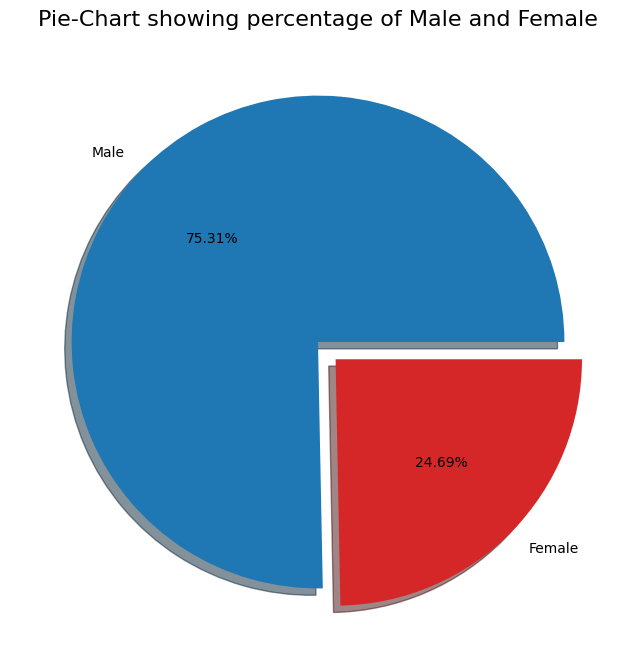

Percentage of Male Customer is higher as compared to female customer


In [10]:
# Pie chart showing the percentage of male and female customers
people_number = df['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['C0','C3']
explode = [0, 0.1]

plt.figure(figsize = (8, 8))
plt.pie(people_number, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Pie-Chart showing percentage of Male and Female', fontsize = 16)
plt.show()

print("Percentage of Male Customer is higher as compared to female customer")

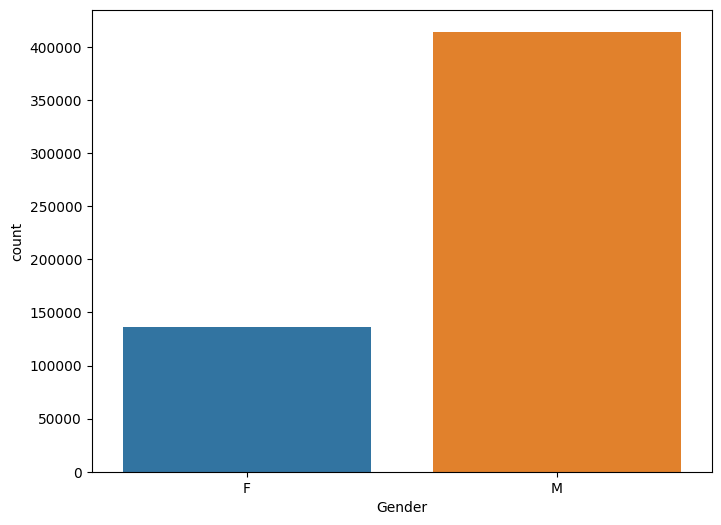

count of Male gender is higher as compared to the Female


In [11]:
# Count plot showing the count of male and female customer
colors = ['C0','C1']

plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'Gender', hue='Gender', palette = colors)
plt.show()
print("count of Male gender is higher as compared to the Female")


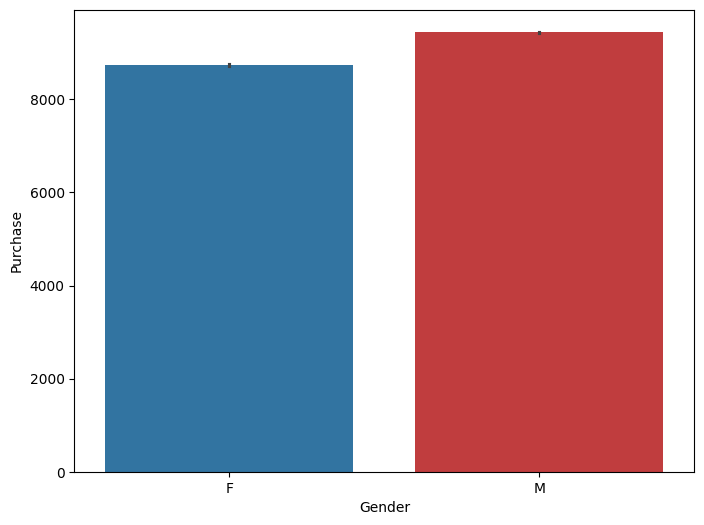

More number of male customers has purchased than female customers on black friday sales.


In [12]:
# Bar plot showing the purchase distribution between genders
colors = ['C0','C3']

plt.figure(figsize=(8,6))
sns.barplot(data = df, x = "Gender", y = "Purchase", hue='Gender', palette = colors)
plt.show()

print("More number of male customers has purchased than female customers on black friday sales.")

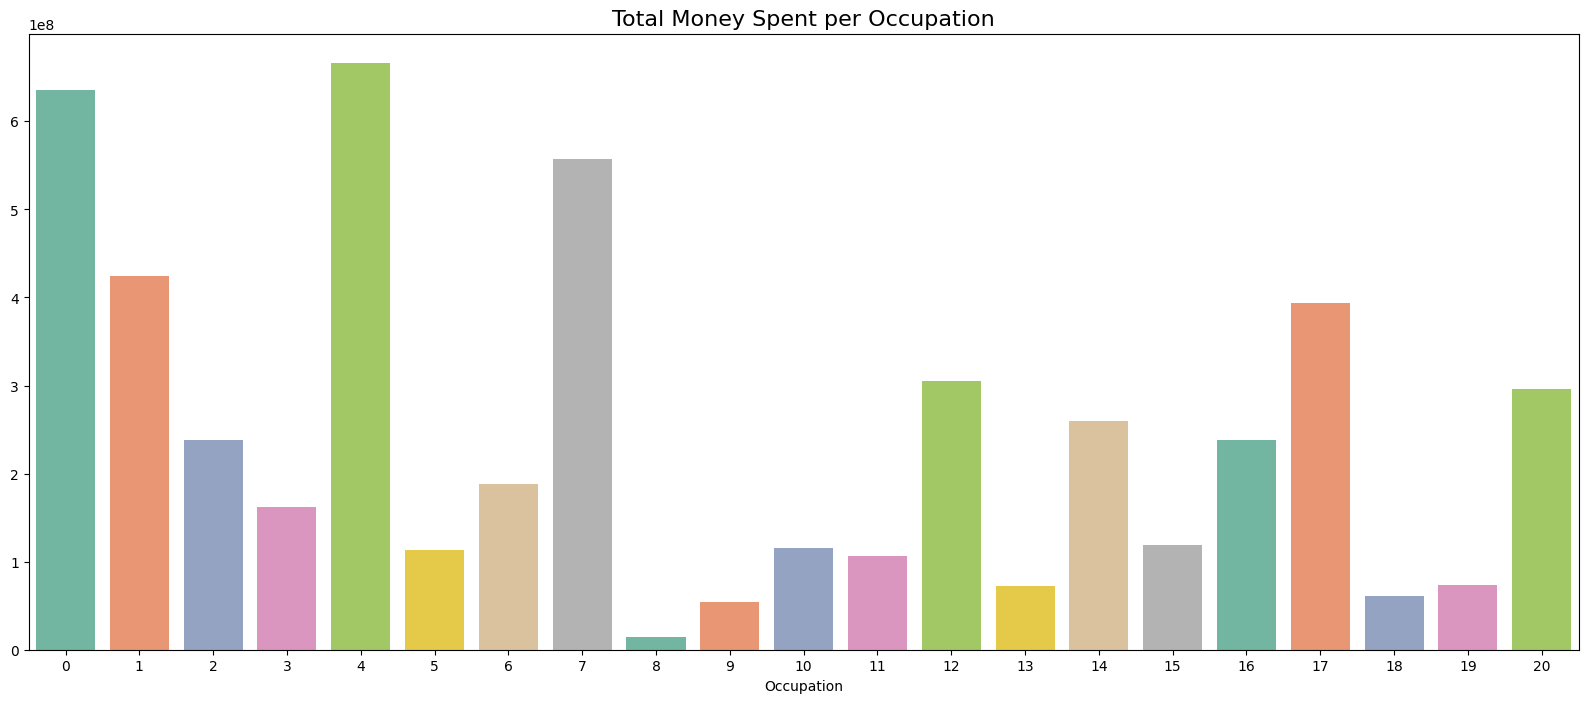

Customers whose occupations are 0 and 4 have done most transactions during black friday sales.


In [13]:
# Bar plot showing total money spent per occupation
palette = sns.color_palette("Set2",21)

Purchased_Occupation = df.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(20, 8))
sns.barplot(x = Purchased_Occupation.index,y = Purchased_Occupation.values, palette=palette)
plt.title('Total Money Spent per Occupation', fontsize = 16)
plt.show()

print("Customers whose occupations are 0 and 4 have done most transactions during black friday sales.")

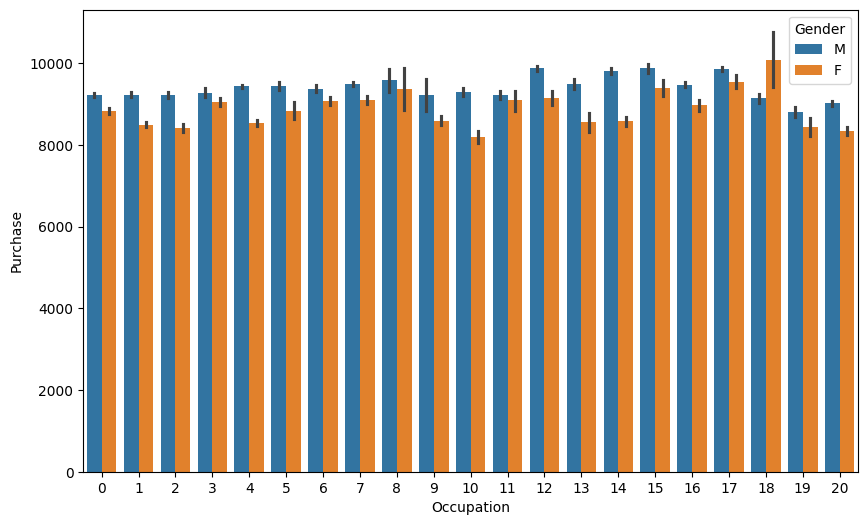

In [14]:
# Bar plot showing purchase distribution based on occupation and gender
plt.figure(figsize = (10,6))
sns.barplot(x = "Occupation", y ="Purchase" , hue = "Gender", data = df)
plt.show()

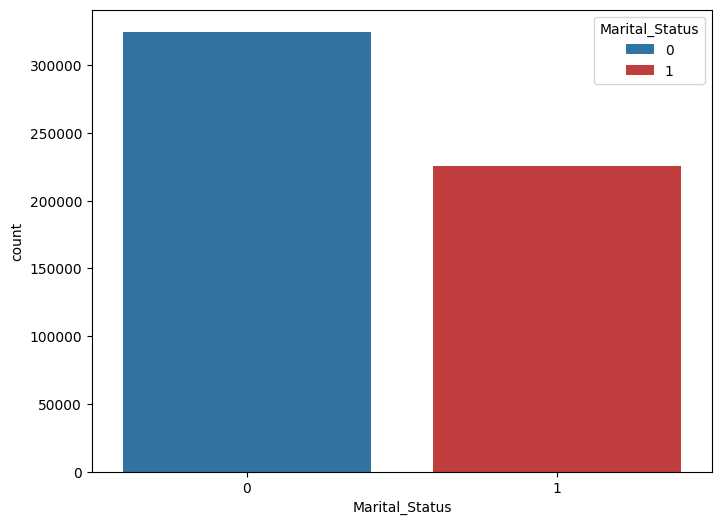

In [15]:
# Count plot showing the distribution of marital status
colors = ['C0','C3']

plt.figure(figsize=(8,6))
sns.countplot(x ='Marital_Status', data = df,  hue ='Marital_Status', palette=colors, legend=True)
plt.show()

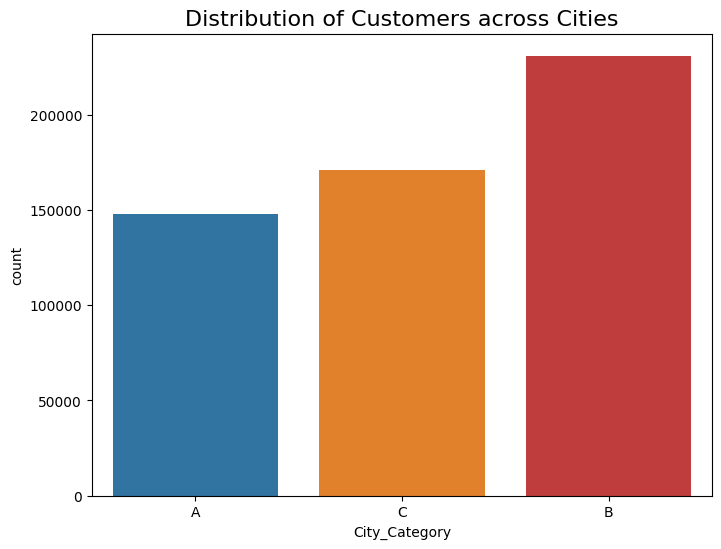

In [16]:
# Count plot showing the distribution of customers across cities
colors = ['C0','C1', 'C3']

plt.figure(figsize=(8,6))
sns.countplot(x ='City_Category', data = df,   palette = colors)
plt.title('Distribution of Customers across Cities', fontsize = 16)
plt.show()

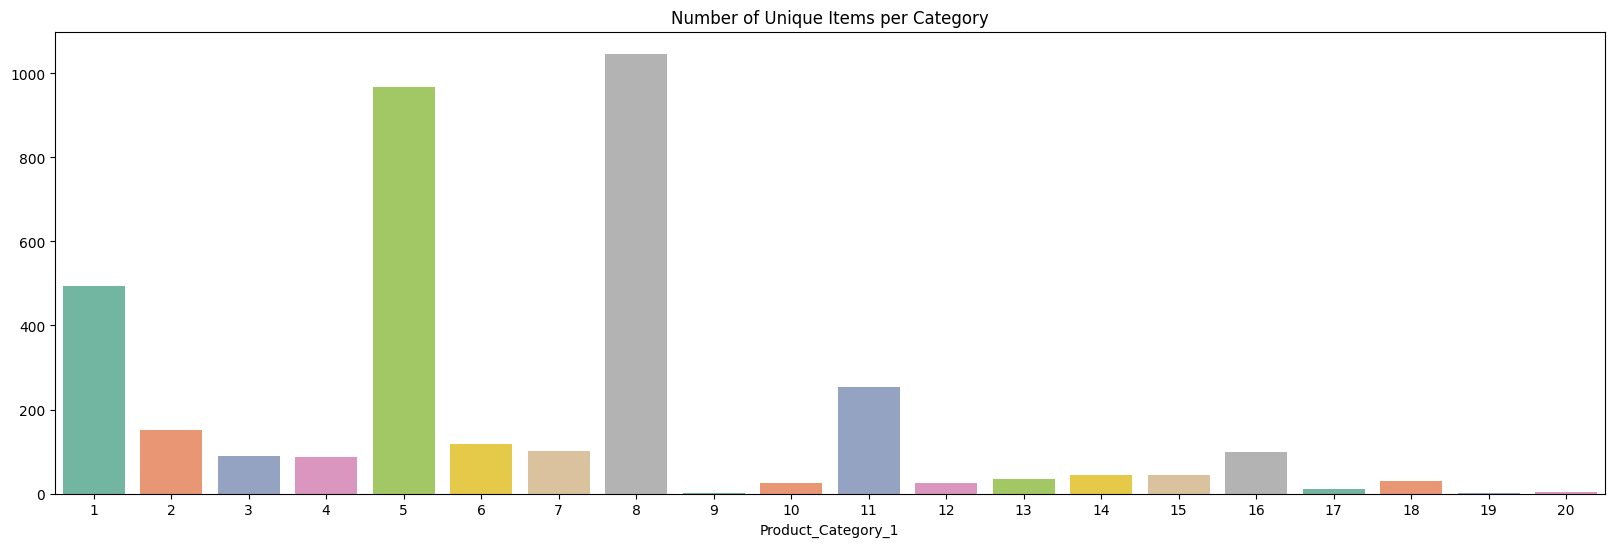

Category labels 1, 5, and 8 have the most products within them.


In [17]:
# Bar plot showing the number of unique items per product category
palette = sns.color_palette("Set2",21)

plt.figure(figsize=(20,6))
prod_by_cat = df.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette=palette)
plt.title('Number of Unique Items per Category')
plt.show()

print("Category labels 1, 5, and 8 have the most products within them.")

## Data Preprocessing

In [18]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [19]:
# Removing the prefix 'P00' from the 'Product_ID' column
df['Product_ID'] = df['Product_ID'].str.replace('P00', '') 

In [20]:
# Standardizing the 'Product_ID' column using StandardScaler
ss = StandardScaler()
df['Product_ID'] = ss.fit_transform(df['Product_ID'].values.reshape(-1,1))

In [21]:
# Dropping the 'Product_Category_3' column due to a high number of missing values
df.drop(['Product_Category_3'], axis =1, inplace = True) 

In [22]:
# Filling missing values in 'Product_Category_2' with the mean
df['Product_Category_2']= df['Product_Category_2'].fillna(df['Product_Category_2'].mean()) 

In [23]:
# Checking for null values again
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [24]:
df.shape

(550068, 11)

### Label Encoding

In [25]:
# Encoding categorical columns using LabelEncoder
categorical_columns = ['Gender', 'City_Category', 'Age']
le = LabelEncoder()
for i in categorical_columns:
    df[i] = le.fit_transform(df[i])
df.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [26]:
# Replacing '4+' in 'Stay_In_Current_City_Years' column with '4'
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4')

In [27]:
# Changing data types to integer
df['Gender'] = df['Gender'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['City_Category'] = df['City_Category'].astype('category')

In [28]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,7969


In [29]:
# Transforming the 'Purchase' column to achieve a normal distribution
df['Purchase'] =np.log(df['Purchase']) 

In [30]:
# Converting categorical variables into dummy/indicator variables
df = pd.get_dummies(df)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,True,False,False
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,True,False,False
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,True,False,False
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,True,False,False
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,False,False,True


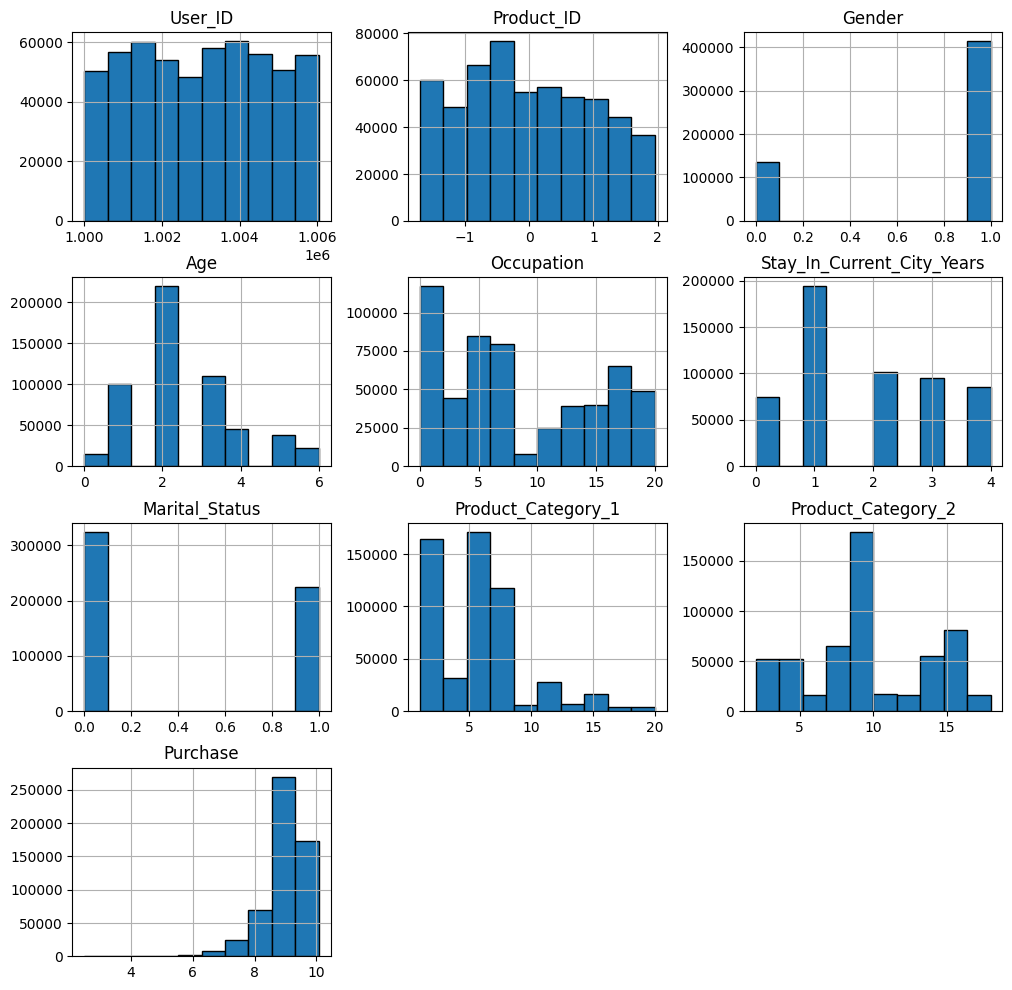

In [31]:
# Displaying histograms for all features
df.hist(edgecolor='black',figsize=(12,12));

### Machine Learning Part

In [32]:
# Splitting the data into features (X) and target variable (y)
X = df.drop(labels = ['Purchase'], axis =1)
y = df['Purchase']

In [33]:
# Splitting the data into 80 percent train size and 20 percent test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
# Standardizing the features using StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Linear Regression 

In [35]:
# Linear Regression model
lr = LinearRegression()

# Hyperparameter tuning for Linear Regression using GridSearchCV
lr_param_grid = {}
lr_grid_search = GridSearchCV(LinearRegression(), param_grid=lr_param_grid, scoring='neg_mean_squared_error', cv=5)
lr_grid_search.fit(X_train, y_train)

lr.fit(X_train, y_train)

LinearRegression()

In [36]:
# Best hyperparameters for Linear Regression
best_lr_params = lr_grid_search.best_params_
print("Best Hyperparameters for Linear Regression:", best_lr_params)

Best Hyperparameters for Linear Regression: {}


In [37]:
# Creating and training Linear Regression with the best parameters
best_lr = LinearRegression()
best_lr.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predicting on the testing set using Linear Regression
lr_y_predict = best_lr.predict(X_test)

In [39]:
# Linear Regression Metrics
lr_mae = mean_absolute_error(y_test, lr_y_predict)
lr_mse = mean_squared_error(y_test, lr_y_predict)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_y_predict)

print("Linear Regression Metrics:")
print(f"MAE: {lr_mae:.3f}")
print(f"MSE: {lr_mse:.3f}")
print(f"RMSE: {lr_rmse:.3f}")
print(f"R-squared: {lr_r2:.3f}")
print()

Linear Regression Metrics:
MAE: 0.456
MSE: 0.444
RMSE: 0.666
R-squared: 0.202



In [40]:
# r2 score is 0.20 and other are higher and our model is not performing well this mean model is not very accurate to predict the purchase or the target columns

### Decision Tree Regression

In [ ]:
# Decision Tree Regressor model
dtr = DecisionTreeRegressor()

# Hyperparameter tuning for Decision Tree using GridSearchCV
dtr_param_grid = {'max_depth': [None, 10, 20, 30],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]}
dtr_grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid=dtr_param_grid, scoring='neg_mean_squared_error', cv=5)
dtr_grid_search.fit(X_train, y_train)

dtr.fit(X_train, y_train)

In [ ]:
# Best hyperparameters for Decision Tree
best_dtr_params = dtr_grid_search.best_params_
print("Best Hyperparameters for Decision Tree:", best_dtr_params)

In [ ]:
# Creating and training Decision Tree with the best parameters
best_dtr = DecisionTreeRegressor(**best_dtr_params)
best_dtr.fit(X_train, y_train)

In [ ]:
# Predicting on testing sets using Decision Tree
dtr_y_predict = best_dtr.predict(X_test)

In [ ]:
# Decision Tree Regression Metrics
dtr_mae = mean_absolute_error(y_test, dtr_y_predict)
dtr_mse = mean_squared_error(y_test, dtr_y_predict)
dtr_rmse = np.sqrt(dtr_mse)
dtr_r2 = r2_score(y_test, dtr_y_predict)

print("Decision Tree Regression Metrics:")
print(f"MAE: {dtr_mae:.3f}")
print(f"MSE: {dtr_mse:.3f}")
print(f"RMSE: {dtr_rmse:.3f}")
print(f"R-squared: {dtr_r2:.3f}")
print()

### Random Forest Regression

In [ ]:
# Random Forest Regressor model
rf = RandomForestRegressor()

# Hyperparameter tuning for Random Forest using GridSearchCV
rfr_param_grid = {'n_estimators': [10, 30],
                  'max_depth': [None, 10],
                  'min_samples_split': [2, 5],
                  'min_samples_leaf': [1, 2]}
rfr_grid_search = GridSearchCV(RandomForestRegressor(), param_grid=rfr_param_grid, scoring='neg_mean_squared_error', cv=5)
rfr_grid_search.fit(X_train, y_train)

rf.fit(X_train, y_train)

In [ ]:
# Best hyperparameters for Random Forest
best_rfr_params = rfr_grid_search.best_params_
print("Best Hyperparameters for Random Forest:", best_rfr_params)

In [ ]:
# Creating and training Random Forest with the best parameters
best_rfr = RandomForestRegressor(**best_rfr_params)
best_rfr.fit(X_train, y_train)


In [ ]:
# Predicting on testing sets using Random Forest
rf_y_predict = best_rfr.predict(X_test)

In [ ]:
# Random Forest Regression Metrics
rf_mae = mean_absolute_error(y_test, rf_y_predict)
rf_mse = mean_squared_error(y_test, rf_y_predict)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_predict)

print("Random Forest Regression Metrics:")
print(f"MAE: {rf_mae:.3f}")
print(f"MSE: {rf_mse:.3f}")
print(f"RMSE: {rf_rmse:.3f}")
print(f"R-squared: {rf_r2:.3f}")

In [ ]:
# Creating a dictionary with metrics data for different models
metrics_data1 = {
    'MAE': [lr_mae, dtr_mae, rf_mae],
    'MSE': [lr_mse, dtr_mse, rf_mse],
    'RMSE': [lr_rmse, dtr_rmse, rf_rmse],
    'R-squared': [lr_r2, dtr_r2, rf_r2]
}
# Creating a DataFrame from the metrics data with model names as index
metrics_df1 = pd.DataFrame(metrics_data1,index=['Linear Regression', 'Decision Tree', 'Random Forest'])

# Displaying the DataFrame
metrics_df1

In [ ]:
metrics_df1.plot( kind='bar')